# ЛР №3 по курсу "Распознавание образов и классическое машинное обучение"

## Метод Главных Компонент (МГК).

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.linalg import svd
import matplotlib.pyplot as plt

Дано 2 матрицы:

In [4]:
M1=np.array([[1,2,6,7],
             [4.5,4,7,8.9],
             [1.3,4.5,6,8],
             [1.3,5,7,8],
             [1,2.5,8.9,5.5],
             [6.7,4.5,3.7,8],
             [3.6,8,1.2,3.4],
             [7.7,7.8,3,3],
             [4.6,3.7,2.5,2]])
df1=pd.DataFrame(M1,columns=['x1','x2','x3','x4'])
df1

,x1,x2,x3,x4
0,1.0,2.0,6.0,7.0
1,4.5,4.0,7.0,8.9
2,1.3,4.5,6.0,8.0
3,1.3,5.0,7.0,8.0
4,1.0,2.5,8.9,5.5
5,6.7,4.5,3.7,8.0
6,3.6,8.0,1.2,3.4
7,7.7,7.8,3.0,3.0
8,4.6,3.7,2.5,2.0


In [5]:
M2=np.array([[1,3.5,5.6,7,8,1,2,3,4],
             [5.5,6.4,1.3,3,4,7.8,4.5,2,9],
             [5.4,4.7,4.8,3.8,2,2,7,8.9,9],
             [1,3,4,6,7.7,4.7,5.6,9,2]])

df2=pd.DataFrame(M2,columns=['x1','x2','x3','x4','x5','x6','x7','x8','x9'])
df2

,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,1.0,3.5,5.6,7.0,8.0,1.0,2.0,3.0,4.0
1,5.5,6.4,1.3,3.0,4.0,7.8,4.5,2.0,9.0
2,5.4,4.7,4.8,3.8,2.0,2.0,7.0,8.9,9.0
3,1.0,3.0,4.0,6.0,7.7,4.7,5.6,9.0,2.0


# 1. Реализовать МГК по шагам




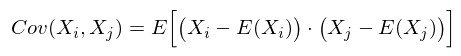

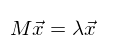

  Шаг 1. Подготовка данных: стандартизация "вручную" (по формуле) и с использованием StandardScaler, сравнить результаты

  Шаг 2. Построить матрицу ковариации "вручную" (по формуле) и с использованием numpy, сравнить результаты, объяснить, что значат элементы матрицы

  Шаг 3. Найти собственные вектора и собственные значения с использованием numpy.linalg

  Шаг 4. Найти главные компонеты по формуле, чему равно количество гланвых компонет?

  Шаг 5. Построить кумулятивный график суммы ообъясненной дисперсии, какое количество главных объясняет 90% диспресии?
  
  Шаг 6. Восстановить исходные данные из всего набор главных и из набора на предыдущем шаге, объяснить полученный результат.

In [6]:

M1_st = (M1 - M1.mean(axis = 0))/M1.std(axis = 0)
M2_st = (M2 - M2.mean(axis = 0))/M2.std(axis = 0)


In [7]:
pd.DataFrame(M1_st)

,0,1,2,3
0,-1.046539,-1.366374,0.403792,0.419597
1,0.405707,-0.341593,0.821507,1.199501
2,-0.922060,-0.085398,0.403792,0.830073
3,-0.922060,0.170797,0.821507,0.830073
4,-1.046539,-1.110179,1.615167,-0.196116
5,1.318546,-0.085398,-0.556954,0.830073
6,0.032272,1.707967,-1.601243,-1.058115
7,1.733474,1.605489,-0.849355,-1.222305
8,0.447199,-0.495311,-1.058213,-1.632781


In [8]:
pd.DataFrame(M2_st)

,0,1,2,3,4,5,6,7,8
0,-0.999874,-0.687243,1.035436,1.269526,1.018505,-1.089228,-1.515720,-0.839879,-0.648886
1,1.022343,1.527207,-1.622698,-1.207598,-0.563639,1.487033,-0.150207,-1.148092,0.973329
2,0.977405,0.229081,0.540899,-0.712173,-1.354710,-0.710366,1.215307,0.978575,0.973329
3,-0.999874,-1.069045,0.046363,0.650245,0.899844,0.312561,0.450620,1.009396,-1.297771


In [9]:
X_scaled_1 = StandardScaler().fit_transform(df1)
pd.DataFrame(X_scaled_1)

,0,1,2,3
0,-1.046539,-1.366374,0.403792,0.419597
1,0.405707,-0.341593,0.821507,1.199501
2,-0.922060,-0.085398,0.403792,0.830073
3,-0.922060,0.170797,0.821507,0.830073
4,-1.046539,-1.110179,1.615167,-0.196116
5,1.318546,-0.085398,-0.556954,0.830073
6,0.032272,1.707967,-1.601243,-1.058115
7,1.733474,1.605489,-0.849355,-1.222305
8,0.447199,-0.495311,-1.058213,-1.632781


In [10]:
X_scaled_2 = StandardScaler().fit_transform(df2)
pd.DataFrame(X_scaled_2)

,0,1,2,3,4,5,6,7,8
0,-0.999874,-0.687243,1.035436,1.269526,1.018505,-1.089228,-1.515720,-0.839879,-0.648886
1,1.022343,1.527207,-1.622698,-1.207598,-0.563639,1.487033,-0.150207,-1.148092,0.973329
2,0.977405,0.229081,0.540899,-0.712173,-1.354710,-0.710366,1.215307,0.978575,0.973329
3,-0.999874,-1.069045,0.046363,0.650245,0.899844,0.312561,0.450620,1.009396,-1.297771


In [11]:
C1 = 1/(df1.shape[0]-1) * (X_scaled_1.T.dot(X_scaled_1))
C1

array([[ 1.125     ,  0.60982103, -0.70512975, -0.38333268],
       [ 0.60982103,  1.125     , -0.75580524, -0.46577938],
       [-0.70512975, -0.75580524,  1.125     ,  0.73164278],
       [-0.38333268, -0.46577938,  0.73164278,  1.125     ]])

In [12]:
C2 = 1/(df2.shape[0]-1) * (X_scaled_2.T.dot(X_scaled_2))
C2

array([[ 1.33333333,  1.18043355, -0.73731296, -1.28339669, -1.27281297,
         0.53417049,  0.69975029, -0.12892506,  1.29760756],
       [ 1.18043355,  1.33333333, -1.03848237, -1.19167086, -0.94435522,
         0.84089962,  0.20298111, -0.67702974,  1.1809212 ],
       [-0.73731296, -1.03848237,  1.33333333,  0.97300472,  0.42605647,
        -1.303526  , -0.21581356,  0.5231581 , -0.59499794],
       [-1.28339669, -1.19167086,  0.97300472,  1.33333333,  1.17452514,
        -0.82313237, -0.77178464,  0.09320828, -1.17873845],
       [-1.27281297, -0.94435522,  0.42605647,  1.17452514,  1.33333333,
        -0.23464559, -0.90000277, -0.20856615, -1.23195627],
       [ 0.53417049,  0.84089962, -1.303526  , -0.82313237, -0.23464559,
         1.33333333,  0.23504537, -0.39069294,  0.35236794],
       [ 0.69975029,  0.20298111, -0.21581356, -0.77178464, -0.90000277,
         0.23504537,  1.33333333,  1.02986509,  0.47847368],
       [-0.12892506, -0.67702974,  0.5231581 ,  0.09320828, -0

In [13]:
np.cov(X_scaled_1.T)

array([[ 1.125     ,  0.60982103, -0.70512975, -0.38333268],
       [ 0.60982103,  1.125     , -0.75580524, -0.46577938],
       [-0.70512975, -0.75580524,  1.125     ,  0.73164278],
       [-0.38333268, -0.46577938,  0.73164278,  1.125     ]])

In [14]:
np.cov(X_scaled_2.T)

array([[ 1.33333333,  1.18043355, -0.73731296, -1.28339669, -1.27281297,
         0.53417049,  0.69975029, -0.12892506,  1.29760756],
       [ 1.18043355,  1.33333333, -1.03848237, -1.19167086, -0.94435522,
         0.84089962,  0.20298111, -0.67702974,  1.1809212 ],
       [-0.73731296, -1.03848237,  1.33333333,  0.97300472,  0.42605647,
        -1.303526  , -0.21581356,  0.5231581 , -0.59499794],
       [-1.28339669, -1.19167086,  0.97300472,  1.33333333,  1.17452514,
        -0.82313237, -0.77178464,  0.09320828, -1.17873845],
       [-1.27281297, -0.94435522,  0.42605647,  1.17452514,  1.33333333,
        -0.23464559, -0.90000277, -0.20856615, -1.23195627],
       [ 0.53417049,  0.84089962, -1.303526  , -0.82313237, -0.23464559,
         1.33333333,  0.23504537, -0.39069294,  0.35236794],
       [ 0.69975029,  0.20298111, -0.21581356, -0.77178464, -0.90000277,
         0.23504537,  1.33333333,  1.02986509,  0.47847368],
       [-0.12892506, -0.67702974,  0.5231581 ,  0.09320828, -0

In [15]:
v1, vec1 = np.linalg.eig(C1)
print('Собственные вектора для М1: {}'.format(vec1.T))
print('Собственные числ для М1: {}'.format(v1))

Собственные вектора для М1: [[ 0.47534538  0.5021132  -0.56548038 -0.44962323]
 [ 0.55098836  0.28447578  0.09672811  0.77854289]
 [ 0.62971885 -0.75855788 -0.01136366 -0.16707779]
 [ 0.27186904  0.30256538  0.81899114 -0.40471587]]
Собственные числ для М1: [2.97058754 0.77441639 0.50484179 0.25015428]


In [16]:
v2, vec2 = np.linalg.eig(C2)
print('Собственные вектора для М2: {}'.format(vec2.T))
print('Собственные числа для М2: {}'.format(v2))

Собственные вектора для М2: [[ 0.40898983+0.j          0.39693558+0.j         -0.316576  +0.j
  -0.42059533+0.j         -0.36477271+0.j          0.26348114+0.j
   0.20558595+0.j         -0.07537262+0.j          0.38421429+0.j        ]
 [ 0.11019284+0.j         -0.20881433+0.j          0.31876189+0.j
  -0.06110603+0.j         -0.29666974+0.j         -0.30885146+0.j
   0.52904617+0.j          0.60984657+0.j          0.06087832+0.j        ]
 [-0.1813066 +0.j         -0.14006783+0.j         -0.42411967+0.j
  -0.05895433+0.j          0.22679691+0.j          0.57945743+0.j
   0.34406027+0.j          0.34333596+0.j         -0.37508801+0.j        ]
 [ 0.17881736-0.24868625j -0.01084585+0.2427474j   0.12668743-0.23974315j
   0.57900419+0.j         -0.34140432+0.22668737j  0.35615131-0.27717977j
  -0.01818137+0.08007882j -0.01393687+0.13333148j -0.00229942+0.20500439j]
 [ 0.17881736+0.24868625j -0.01084585-0.2427474j   0.12668743+0.23974315j
   0.57900419-0.j         -0.34140432-0.22668737j  0.3

In [17]:
principal_components_1 = vec1
num_components = principal_components_1.shape[0]
print("Количество главных компонент:", num_components)
print("Главные компоненты:", principal_components_1[0])

Количество главных компонент: 4
Главные компоненты: [0.47534538 0.55098836 0.62971885 0.27186904]


In [18]:
principal_components_2 = vec2
num_components = principal_components_2.shape[1]
print("Количество главных компонент:", num_components)
print("Главные компоненты:", principal_components_2[0])

Количество главных компонент: 9
Главные компоненты: [ 0.40898983+0.j          0.11019284+0.j         -0.1813066 +0.j
  0.17881736-0.24868625j  0.17881736+0.24868625j -0.13039181+0.j
 -0.21896446-0.01391242j -0.21896446+0.01391242j -0.12373005+0.j        ]


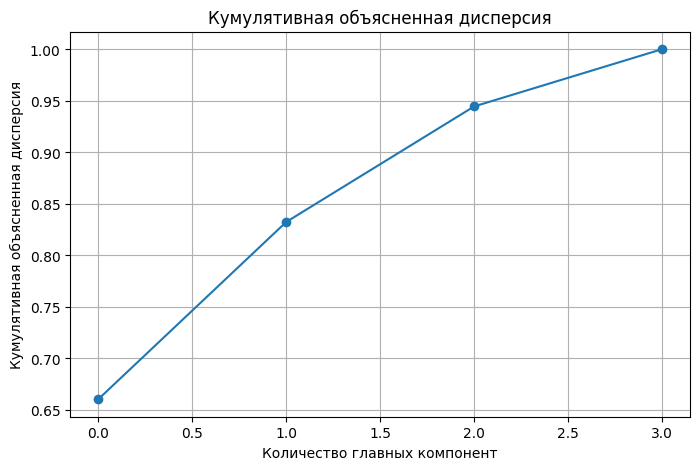

Количество главных компонент, объясняющих 90% дисперсии: 3


In [19]:
new_v1 = v1/v1.sum()
cum1 =np.cumsum(new_v1)
plt.figure(figsize=(8, 5))
plt.plot(cum1, marker='o')
plt.title('Кумулятивная объясненная дисперсия')
plt.xlabel('Количество главных компонент')
plt.ylabel('Кумулятивная объясненная дисперсия')
plt.grid()
plt.show()

# Количество главных компонент, объясняющих 90% дисперсии
num_components_90_1 = np.argmax(cum1 >= 0.90) + 1
print("Количество главных компонент, объясняющих 90% дисперсии:", num_components_90_1)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


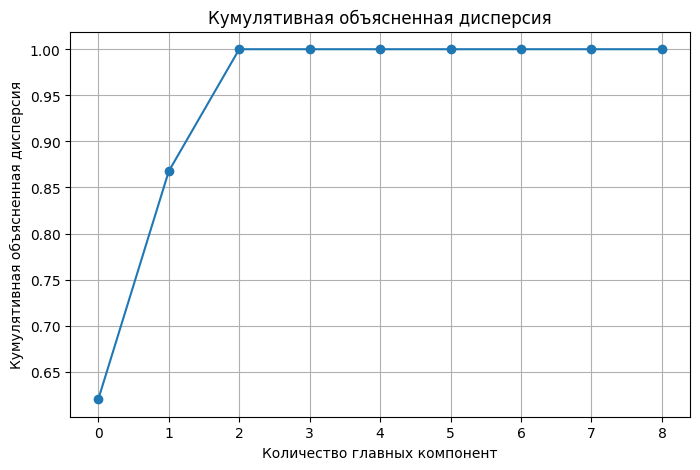

Количество главных компонент, объясняющих 90% дисперсии: 3


In [20]:
new_v2 = v2/v2.sum()
cum2 =np.cumsum(new_v2)
plt.figure(figsize=(8, 5))
plt.plot(cum2, marker='o')
plt.title('Кумулятивная объясненная дисперсия')
plt.xlabel('Количество главных компонент')
plt.ylabel('Кумулятивная объясненная дисперсия')
plt.grid()
plt.show()

# Количество главных компонент, объясняющих 90% дисперсии
num_components_90_2 = np.argmax(cum2 >= 0.90) + 1
print("Количество главных компонент, объясняющих 90% дисперсии:", num_components_90_2)

In [21]:
X_scaled_1 

array([[-1.04653865, -1.36637397,  0.40379165,  0.41959731],
       [ 0.40570662, -0.34159349,  0.82150714,  1.19950101],
       [-0.92206049, -0.08539837,  0.40379165,  0.83007294],
       [-0.92206049,  0.17079675,  0.82150714,  0.83007294],
       [-1.04653865, -1.11017885,  1.61516658, -0.19611614],
       [ 1.3185465 , -0.08539837, -0.55695399,  0.83007294],
       [ 0.03227212,  1.70796746, -1.60124273, -1.05811496],
       [ 1.73347372,  1.60548942, -0.84935484, -1.22230521],
       [ 0.44719934, -0.49531056, -1.05821259, -1.63278085]])

In [22]:
reconstructed_full_1 = np.dot(M1_st, principal_components_1.T)
reconstructed_90_1 = np.dot(M1_st[:, :num_components_90_1], principal_components_1[:, :num_components_90_1].T)
print("Восстановленные данные из всего набора главных компонент:\n", reconstructed_full_1)
print("Восстановленные данные из набора, объясняющего 90% дисперсии:\n", reconstructed_90_1)

Восстановленные данные из всего набора главных компонент:
 [[-0.88197274 -1.09352489  0.79868824 -0.83051496]
 [ 0.84806245 -0.15369766  0.71058454 -1.07107299]
 [-0.00540435 -0.54242051  1.18838052 -0.05531479]
 [ 0.39879949 -0.78640058  1.20841502  0.07435312]
 [-0.14538001 -2.12583516  0.30543999 -0.58426091]
 [ 0.45465818  1.31139901 -0.06772118 -0.90222448]
 [-0.33959083  1.39656597 -0.70143158  2.01098364]
 [ 0.841443    1.60158045 -1.81635478  1.10712697]
 [-1.17061519  0.39233337 -1.62600077  0.25092441]]
Восстановленные данные из набора, объясняющего 90% дисперсии:
 [[-0.99604826 -1.22048051  0.45504176 -0.66069727]
 [ 0.52195525 -0.51662514 -0.27179615 -0.5856159 ]
 [-0.23107549 -0.79357185  0.50855814  0.2806289 ]
 [ 0.17312836 -1.03755192  0.52859263  0.41029681]
 [-0.0920621  -2.0664972   0.46605737 -0.66363223]
 [ 0.22898705  1.06024767 -0.74754356 -0.56628079]
 [-0.05192213  1.71671492  0.16515519  1.58274773]
 [ 1.17374995  1.9714077  -0.81529765  0.61244065]
 [-0.72671

In [23]:
reconstructed_full_2 = np.dot(M2_st, principal_components_2.T)
reconstructed_90_2 = np.dot(M2_st[:, :num_components_90_2], principal_components_2[:, :num_components_90_2].T)
print("Восстановленные данные из всего набора главных компонент:\n", reconstructed_full_2)
print("Восстановленные данные из набора, объясняющего 90% дисперсии:\n", reconstructed_90_2)

Восстановленные данные из всего набора главных компонент:
 [[ 0.47484645-0.053023j   -0.6280462 +0.1291194j   0.47536219+0.12268786j
   2.38906474+0.22760821j -1.81669285-0.08548361j  2.13537497+0.16169357j
  -0.55227841+0.05549677j -0.51579678-0.00050755j -2.44685538+0.0514605j ]
 [ 0.53384738+0.1462609j   0.75684111-0.25699463j  1.06086967-0.11562198j
  -2.63717456-0.33606537j  0.22067794+0.06425806j -1.99882432-0.16298188j
   0.26039851-0.10382892j  0.63123595-0.03569334j  0.86265279-0.13201454j]
 [-0.55085791-0.16308365j  0.08458658+0.1320906j  -1.14384464-0.21809874j
  -1.15365116-0.07972623j  1.3928218 +0.19553012j -0.1841125 -0.25910772j
   0.58546028+0.03905541j  0.84927201+0.09757169j  2.13946626+0.13172291j]
 [-0.45783592+0.06984575j -0.2133815 -0.00421538j -0.39238722+0.21103286j
   1.40176098+0.1881834j   0.20319311-0.17430457j  0.04756185+0.26039604j
  -0.29358038+0.00927675j -0.96471119-0.0613708j  -0.55526367-0.05116887j]]
Восстановленные данные из набора, объясняющего 9

# 2. Реализовать МГК с использованием библиотеки sklearn PCA

https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

  - Использовать стандартизованные данные

  Шаг 1. Вывести собственные вектора и собственные значения с использованием sklearn PCA

  Шаг 2. Найти главные компонеты с использованием sklearn PCA (показать как они получаются - можно взять из семинара (Компонета представляет собой линейную комбинацию исходных
переменных)), чему равно количество главных компонет?

  Шаг 3. Какое количество главных компонент, которое объясняет 90% диспресии?
  
  Шаг 4. Восстановить исходные данные из всего набор главных и из набора на предыдущем шаге, объяснить полученный результат.

  Сравнить все полученные результаты с результатами из 1 задания.

In [24]:
pca = PCA()
M1_y = pca.fit_transform(M1_st)
M1_y

array([[ 1.60053867, -0.59959841, -0.30275469, -0.53705483],
       [ 0.98253752,  1.13969036, -0.30485423,  0.19429468],
       [ 1.08273317,  0.15296703,  0.65913456, -0.28176021],
       [ 1.19030414,  0.26625316,  0.85822017,  0.13786085],
       [ 1.88006941, -0.88890243, -0.19752224,  0.78175528],
       [-0.52561181,  1.29458429, -0.76273547, -0.45945069],
       [-2.25415782, -0.47501612,  1.08028633, -0.35762207],
       [-2.66000646,  0.37807317, -0.08761626,  0.75611559],
       [-1.29640681, -1.26805105, -0.94215816, -0.23413859]])

In [25]:
pca.explained_variance_ratio_

array([0.66013056, 0.17209253, 0.11218706, 0.05558984])

In [26]:
cs = pca.explained_variance_ratio_.cumsum()
(cs > 0.9).argmax() + 1  # 0.9 -> 3

3

In [27]:
pca.explained_variance_ # eigenvalues

array([2.97058754, 0.77441639, 0.50484179, 0.25015428])

In [28]:
pca.components_ # eigenvectors

array([[-0.47534538, -0.5021132 ,  0.56548038,  0.44962323],
       [ 0.55098836,  0.28447578,  0.09672811,  0.77854289],
       [-0.62971885,  0.75855788,  0.01136366,  0.16707779],
       [ 0.27186904,  0.30256538,  0.81899114, -0.40471587]])

In [29]:
pca.inverse_transform(M1_y)

array([[-1.04653865, -1.36637397,  0.40379165,  0.41959731],
       [ 0.40570662, -0.34159349,  0.82150714,  1.19950101],
       [-0.92206049, -0.08539837,  0.40379165,  0.83007294],
       [-0.92206049,  0.17079675,  0.82150714,  0.83007294],
       [-1.04653865, -1.11017885,  1.61516658, -0.19611614],
       [ 1.3185465 , -0.08539837, -0.55695399,  0.83007294],
       [ 0.03227212,  1.70796746, -1.60124273, -1.05811496],
       [ 1.73347372,  1.60548942, -0.84935484, -1.22230521],
       [ 0.44719934, -0.49531056, -1.05821259, -1.63278085]])

In [30]:
pca = PCA(n_components=3)
M1_y_90 = pca.fit_transform(M1_st)
M1_cleared_90 = pca.inverse_transform(M1_y_90)
pd.DataFrame(M1_cleared_90)

,0,1,2,3
0,-0.900530,-1.203880,0.843635,0.202243
1,0.352884,-0.400380,0.662382,1.278135
2,-0.845459,-0.000147,0.634551,0.716040
3,-0.959541,0.129085,0.708600,0.885867
4,-1.259074,-1.346711,0.974916,0.120273
5,1.443457,0.053616,-0.180668,0.644126
6,0.129498,1.816172,-1.308353,-1.202850
7,1.527909,1.376715,-1.468607,-0.916293
8,0.510854,-0.424468,-0.866455,-1.727540


Аналогичным образом находим для М2

In [31]:
pca = PCA()
M2_y = pca.fit_transform(M2_st)
M2_y

array([[ 2.69961245e+00, -1.03352720e+00, -1.20308671e+00,
        -3.45392854e-16],
       [-3.07297441e+00, -1.66213992e+00,  2.83037204e-01,
        -3.45392854e-16],
       [-1.47603234e+00,  2.19609173e+00, -7.26553280e-01,
        -3.45392854e-16],
       [ 1.84939430e+00,  4.99575395e-01,  1.64660279e+00,
        -3.45392854e-16]])

In [32]:
pca.explained_variance_ratio_

array([6.20278051e-01, 2.47313390e-01, 1.32408559e-01, 1.32551360e-32])

In [33]:
cs = pca.explained_variance_ratio_.cumsum()
(cs > 0.9).argmax() + 1  # 0.9 -> 3

3

In [34]:
pca.explained_variance_ # eigenvalues

array([7.44333661e+00, 2.96776068e+00, 1.58890270e+00, 1.59061632e-31])

In [35]:
pca.components_ # eigenvectors

array([[-0.40898983, -0.39693558,  0.316576  ,  0.42059533,  0.36477271,
        -0.26348114, -0.20558595,  0.07537262, -0.38421429],
       [ 0.11019284, -0.20881433,  0.31876189, -0.06110603, -0.29666974,
        -0.30885146,  0.52904617,  0.60984657,  0.06087832],
       [-0.1813066 , -0.14006783, -0.42411967, -0.05895433,  0.22679691,
         0.57945743,  0.34406027,  0.34333596, -0.37508801],
       [-0.21378213,  0.80612598, -0.11488336,  0.28321886,  0.03729571,
        -0.29627042,  0.22118664,  0.10417226, -0.24920769]])

In [36]:
pd.DataFrame(pca.inverse_transform(M2_y))

,0,1,2,3,4,5,6,7,8
0,-0.999874,-0.687243,1.035436,1.269526,1.018505,-1.089228,-1.515720,-0.839879,-0.648886
1,1.022343,1.527207,-1.622698,-1.207598,-0.563639,1.487033,-0.150207,-1.148092,0.973329
2,0.977405,0.229081,0.540899,-0.712173,-1.354710,-0.710366,1.215307,0.978575,0.973329
3,-0.999874,-1.069045,0.046363,0.650245,0.899844,0.312561,0.450620,1.009396,-1.297771


In [37]:
pca = PCA(n_components=3)
M2_y_90 = pca.fit_transform(M2_st)
M2_cleared_90 = pca.inverse_transform(M2_y_90)
pd.DataFrame(M2_cleared_90)

,0,1,2,3,4,5,6,7,8
0,-0.999874,-0.687243,1.035436,1.269526,1.018505,-1.089228,-1.515720,-0.839879,-0.648886
1,1.022343,1.527207,-1.622698,-1.207598,-0.563639,1.487033,-0.150207,-1.148092,0.973329
2,0.977405,0.229081,0.540899,-0.712173,-1.354710,-0.710366,1.215307,0.978575,0.973329
3,-0.999874,-1.069045,0.046363,0.650245,0.899844,0.312561,0.450620,1.009396,-1.297771


# 3. Реализовать SVD с использованием numpy svd

Для любой матрицы существует ее SVD-разложение (доказательство сего факта представлено здесь http://www.machinelearning.ru/wiki/images/e/ee/Kitov-ML-eng-04-Singular_value_decomposition.pdf, страница 7).

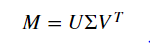

U — матрица левых сингулярных векторов в столбцах

Σ — диагональная матрица с сингулярными значениями

V — матрица правых сингулярных векторов в столбцах

Такое использование SVD очень похоже на анализ главных компонент (PCA), и на самом деле несколько библиотек численного программного обеспечения фактически используют SVD под капотом для своих подпрограмм PCA, например, sklearn.decomposition.PCA в scikit-learn. Это связано с тем, что он более численно стабилен, а также возможно выполнить усеченный SVD, для которого нам нужно только вычислить $U \Sigma V^T$ для первых $k<n$ признаков; это делает ее вычисление намного быстрее, чем полную ковариационную матрицу, вычисленную в PCA.

Обратите внимание, что некоторые знаки перевернуты, это нормально из-за заявленной ранее неоднозначности разложения.

  - Использовать стандартизованные данные

  Шаг 1. Получить U, S, VT матрицы

  Шаг 2. Из svd разложения получить матрицу ковариации

  Шаг 3. Из svd разложения получить собственные вектора, собственные числа и процент объясненной дисперсии

  Шаг 4. Из svd разложения восстановить исходные данные по количеству k компонент и по всему набору

  Сравнить результаты с результатами полученными в 1 и 2 задании.

#### Для М1

In [39]:
U,S,VT = np.linalg.svd(M1_st,full_matrices=False)
pd.DataFrame(U)

,0,1,2,3
0,-0.328322,-0.240895,-0.150650,-0.379638
1,-0.201550,0.457883,-0.151694,0.137345
2,-0.222103,0.061456,0.327983,-0.199173
3,-0.244170,0.106970,0.427047,0.097452
4,-0.385663,-0.357126,-0.098286,0.552614
5,0.107820,0.520113,-0.379535,-0.324781
6,0.462400,-0.190843,0.537547,-0.252799
7,0.545653,0.151895,-0.043598,0.534490
8,0.265935,-0.509453,-0.468815,-0.165510


In [43]:
VT # eigenvectors
l_svd = S**2 / (M1_st.shape[0]-1) # eigenvalues
(l_svd/l_svd.sum()).cumsum()
S_V = np.diag(S)
C1_svd = VT.T.dot((S_V**2)).dot(VT) # covarience matrix
C1_svd/8

array([[ 1.125     ,  0.60982103, -0.70512975, -0.38333268],
       [ 0.60982103,  1.125     , -0.75580524, -0.46577938],
       [-0.70512975, -0.75580524,  1.125     ,  0.73164278],
       [-0.38333268, -0.46577938,  0.73164278,  1.125     ]])

In [44]:
VT.dot(U.T)

array([[-0.02113953,  0.15813009, -0.17063302, -0.34765756, -0.5555299 ,
         0.67305571, -0.06633273,  0.11997675,  0.21013017],
       [-0.55956699,  0.11146054, -0.22823324,  0.01307401,  0.10663715,
        -0.08220002,  0.05566803,  0.75576484, -0.17260432],
       [-0.04112343,  0.49547416,  0.15693047,  0.25603623,  0.06317077,
         0.2680634 , -0.47207622, -0.13958087, -0.58689452],
       [-0.13188239, -0.09607762,  0.30743522,  0.27629082, -0.51705114,
         0.00728962,  0.61052766, -0.05771808, -0.39881408]])

In [45]:
M1_y = M1_st.dot(VT.T)
pd.DataFrame(M1_y)

,0,1,2,3
0,-1.600539,-0.599598,-0.302755,-0.537055
1,-0.982538,1.139690,-0.304854,0.194295
2,-1.082733,0.152967,0.659135,-0.281760
3,-1.190304,0.266253,0.858220,0.137861
4,-1.880069,-0.888902,-0.197522,0.781755
5,0.525612,1.294584,-0.762735,-0.459451
6,2.254158,-0.475016,1.080286,-0.357622
7,2.660006,0.378073,-0.087616,0.756116
8,1.296407,-1.268051,-0.942158,-0.234139


In [46]:
M1_cleared = VT.T.dot(M1_y.T).T
pd.DataFrame(M1_cleared)

,0,1,2,3
0,-1.046539,-1.366374,0.403792,0.419597
1,0.405707,-0.341593,0.821507,1.199501
2,-0.922060,-0.085398,0.403792,0.830073
3,-0.922060,0.170797,0.821507,0.830073
4,-1.046539,-1.110179,1.615167,-0.196116
5,1.318546,-0.085398,-0.556954,0.830073
6,0.032272,1.707967,-1.601243,-1.058115
7,1.733474,1.605489,-0.849355,-1.222305
8,0.447199,-0.495311,-1.058213,-1.632781


In [47]:
M1_y_90 = M1_st.dot(VT[:3].T)
pd.DataFrame(M1_y_90)

,0,1,2
0,-1.600539,-0.599598,-0.302755
1,-0.982538,1.139690,-0.304854
2,-1.082733,0.152967,0.659135
3,-1.190304,0.266253,0.858220
4,-1.880069,-0.888902,-0.197522
5,0.525612,1.294584,-0.762735
6,2.254158,-0.475016,1.080286
7,2.660006,0.378073,-0.087616
8,1.296407,-1.268051,-0.942158


In [48]:
M1_cleared_90 = VT.T[:,:3].dot(M1_y_90.T).T
pd.DataFrame(M1_cleared_90)

,0,1,2,3
0,-0.900530,-1.203880,0.843635,0.202243
1,0.352884,-0.400380,0.662382,1.278135
2,-0.845459,-0.000147,0.634551,0.716040
3,-0.959541,0.129085,0.708600,0.885867
4,-1.259074,-1.346711,0.974916,0.120273
5,1.443457,0.053616,-0.180668,0.644126
6,0.129498,1.816172,-1.308353,-1.202850
7,1.527909,1.376715,-1.468607,-0.916293
8,0.510854,-0.424468,-0.866455,-1.727540


#### Аналогично для М2

In [49]:
U,S,VT = np.linalg.svd(M2_st,full_matrices=False)
pd.DataFrame(U)

,0,1,2,3
0,-0.571290,-0.346375,-0.551046,0.5
1,0.650301,-0.557048,0.129639,0.5
2,0.312357,0.735996,-0.332781,0.5
3,-0.391368,0.167427,0.754188,0.5


In [50]:
VT # eigenvectors
l_svd = S**2 / (M1_st.shape[0]-1) # eigenvalues
(l_svd/l_svd.sum()).cumsum()
S_V = np.diag(S)
C2_svd = VT.T.dot((S_V**2)).dot(VT) / (M2_st.shape[0]-1) # covarience matrix
pd.DataFrame(C2_svd)

,0,1,2,3,4,5,6,7,8
0,1.333333,1.180434,-0.737313,-1.283397,-1.272813,0.534170,0.699750,-0.128925,1.297608
1,1.180434,1.333333,-1.038482,-1.191671,-0.944355,0.840900,0.202981,-0.677030,1.180921
2,-0.737313,-1.038482,1.333333,0.973005,0.426056,-1.303526,-0.215814,0.523158,-0.594998
3,-1.283397,-1.191671,0.973005,1.333333,1.174525,-0.823132,-0.771785,0.093208,-1.178738
4,-1.272813,-0.944355,0.426056,1.174525,1.333333,-0.234646,-0.900003,-0.208566,-1.231956
5,0.534170,0.840900,-1.303526,-0.823132,-0.234646,1.333333,0.235045,-0.390693,0.352368
6,0.699750,0.202981,-0.215814,-0.771785,-0.900003,0.235045,1.333333,1.029865,0.478474
7,-0.128925,-0.677030,0.523158,0.093208,-0.208566,-0.390693,1.029865,1.333333,-0.309992
8,1.297608,1.180921,-0.594998,-1.178738,-1.231956,0.352368,0.478474,-0.309992,1.333333


In [51]:
M2_y = M2_st.dot(VT.T)
pd.DataFrame(M2_y)

,0,1,2,3
0,-2.699612,-1.033527,-1.203087,-2.014679e-16
1,3.072974,-1.662140,0.283037,1.634470e-15
2,1.476032,2.196092,-0.726553,-1.862733e-15
3,-1.849394,0.499575,1.646603,1.428932e-15


In [52]:
M2_cleared = VT.T.dot(M2_y.T).T
pd.DataFrame(M2_cleared)

,0,1,2,3,4,5,6,7,8
0,-0.999874,-0.687243,1.035436,1.269526,1.018505,-1.089228,-1.515720,-0.839879,-0.648886
1,1.022343,1.527207,-1.622698,-1.207598,-0.563639,1.487033,-0.150207,-1.148092,0.973329
2,0.977405,0.229081,0.540899,-0.712173,-1.354710,-0.710366,1.215307,0.978575,0.973329
3,-0.999874,-1.069045,0.046363,0.650245,0.899844,0.312561,0.450620,1.009396,-1.297771


In [53]:
M2_y_90 = M2_st.dot(VT[:3].T)
pd.DataFrame(M2_y_90)


,0,1,2
0,-2.699612,-1.033527,-1.203087
1,3.072974,-1.662140,0.283037
2,1.476032,2.196092,-0.726553
3,-1.849394,0.499575,1.646603


In [54]:
M2_cleared_90 = VT.T[:,:3].dot(M2_y_90.T).T
pd.DataFrame(M2_cleared_90)

,0,1,2,3,4,5,6,7,8
0,-0.999874,-0.687243,1.035436,1.269526,1.018505,-1.089228,-1.515720,-0.839879,-0.648886
1,1.022343,1.527207,-1.622698,-1.207598,-0.563639,1.487033,-0.150207,-1.148092,0.973329
2,0.977405,0.229081,0.540899,-0.712173,-1.354710,-0.710366,1.215307,0.978575,0.973329
3,-0.999874,-1.069045,0.046363,0.650245,0.899844,0.312561,0.450620,1.009396,-1.297771
